In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
%matplotlib inline
import numpy as np

import pyoz as oz
from pyoz.potentials import hard_sphere, square_well, mie, lennard_jones

In [2]:
L = 30
n = 10
diameter = 7.2
rho = (diameter / 2)**3 * n / L**3

In [3]:
hs = oz.System()
r = hs.r
hs.set_interaction(0, 0, hard_sphere(r, d=diameter)) 
g_r_hs, _, _, _ = hs.solve(rhos=[rho], closure='Percus-Yevick')

[INFO][2016-10-20 10:22:00,752] Initialized: <System; 1 component; ρ: 0.01728>
[INFO][2016-10-20 10:22:02,809] Converged in 2.06s after 652 iterations


In [4]:
sw = oz.System()
well_depth = 1
attraction_diameter = diameter + 1.5
sw.set_interaction(0, 0, square_well(r, d=diameter, da=attraction_diameter, e=well_depth)) 
g_r_sw, _, _, _ = sw.solve(rhos=[rho], closure='Percus-Yevick')

[INFO][2016-10-20 10:22:02,844] Initialized: <System; 1 component; ρ: 0.01728>
[INFO][2016-10-20 10:22:03,117] Converged in 0.27s after 616 iterations


In [5]:
lj = oz.System()
m = 24
n = 6
lj.set_interaction(0, 0, mie(r, eps=well_depth, sig=diameter/2, m=m, n=n))
g_r_lj, _, _, _ = lj.solve(rhos=[rho], closure='HNC')

[INFO][2016-10-20 10:22:03,151] Initialized: <System; 1 component; ρ: 0.01728>
[INFO][2016-10-20 10:22:03,474] Converged in 0.32s after 657 iterations


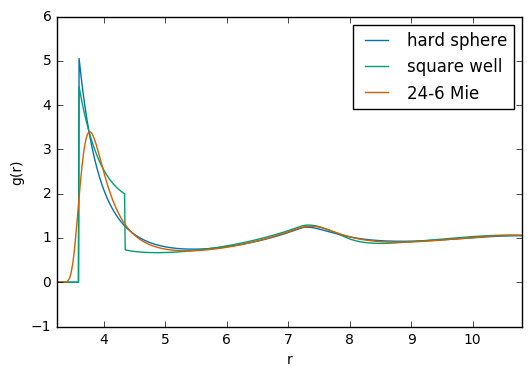

In [8]:
plt.plot(r, g_r_hs[0, 0], label='hard sphere')  # All f(r)/f(k) have shape (n_components, n_components, r)
plt.plot(r, g_r_sw[0, 0], label='square well')
plt.plot(r, g_r_lj[0, 0], label='{}-{} Mie'.format(m, n))
plt.xlim(diameter / 2 * 0.9, diameter * 1.5)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.legend(loc='upper right')